# Prediction for Home price
### Build the Linear Regression Model with multi-variables combination like, 'area','beds','baths','garage','year','lotsize' to predict home price

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [170]:
# load the dataset
df0 = pd.read_csv('homes.csv')
df0[:5]

,price,area,beds,baths,garage,year,style,lotsize,ac,pool,quality,highway
0,360000,3032,4,4,2,1972,1,22221,YES,NO,MEDIUM,NO
1,340000,2058,4,2,2,1976,1,22912,YES,NO,MEDIUM,NO
2,250000,1780,4,3,2,1980,1,21345,YES,NO,MEDIUM,NO
3,205500,1638,4,2,2,1963,1,17342,YES,NO,MEDIUM,NO
4,275500,2196,4,3,2,1968,7,21786,YES,NO,MEDIUM,NO


In [171]:
# Reduce the dataset to houses with two to five bedrooms
# style 1 to 7, and houses not close to a highway. 
# Then remove column highway
df = df0[(df0.beds <= 5) & (df0.beds >= 2) 
         & (df0['style'] <= 7) & (df0['style'] >= 1) 
         & (df0['highway'] == 'NO')]
df_all = df
del df['highway']
df.shape

(485, 11)

In [148]:
# convert the column style to categorical variables
df0['style'] = df0['style'].apply(str)
df0.dtypes

price       int64
area        int64
beds        int64
baths       int64
garage      int64
year        int64
style      object
lotsize     int64
ac         object
pool       object
quality    object
highway    object
dtype: object

In [116]:
# Fit a full multiple regression model (with all numerical variables as predictors only)

In [149]:
l1 = ['price','area','beds','baths','garage','year','lotsize']
df1 = df[l1]

In [150]:
# Select response Y and predictors X
Y = df1.price
X = df1.drop(columns = 'price', axis = 1)

In [151]:
model1 = LinearRegression().fit(X,Y)
yhat = model1.predict(X)
df1['predict'] = yhat
df1

/Users/mengkaiqi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,price,area,beds,baths,garage,year,lotsize,predict
0,360000,3032,4,4,2,1972,22221,387523.972057
1,340000,2058,4,2,2,1976,22912,254914.972087
2,250000,1780,4,3,2,1980,21345,229040.919709
3,205500,1638,4,2,2,1963,17342,167476.019278
4,275500,2196,4,3,2,1968,21786,263709.738653
...,...,...,...,...,...,...,...,...
517,137000,1655,2,1,1,1935,54651,178827.465940
518,185000,1944,3,2,2,1939,17999,176506.236735
519,133500,1922,3,1,2,1950,14805,180382.436821
520,124000,1480,3,2,2,1953,28351,158261.432775


In [120]:
# Find the largest outlier (in absolute value)

In [153]:
df1['residual'] = abs(df1['price']-df1['predict'])
df1_out = df1[df1.residual == df1.residual.max()]
df1_out

/Users/mengkaiqi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,area,beds,baths,garage,year,lotsize,predict,residual
72,920000,3857,4,5,3,1997,32793,585109.735963,334890.264037


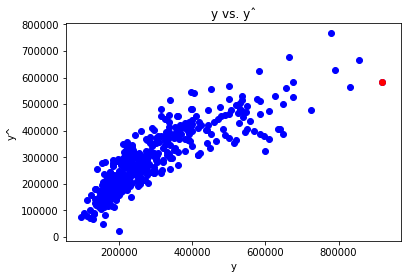

In [157]:
# Plot y vs. yˆ labeling the largest outlier
plt.title("y vs. yˆ")
plt.scatter(df1.price, df1.predict,color = "blue")
plt.scatter(df1_out.price, df1_out.predict, color="red")
plt.xlabel('y')
plt.ylabel('y^')
plt.show()

In [281]:
# Find the predicted price when all predictors are equal to their median values
# find the median values
m1_des = np.around(df1.describe(),2)
median = median.iloc[5:6]
median

,price,area,beds,baths,garage,year,lotsize,predict,residual
50%,229900.0,2058.0,3.0,3.0,2.0,1965.0,22144.0,249274.16,32934.45


In [284]:
Xc = median.drop(["price","residual","predict"], axis = 1)
yhat_c = model1.predict(Xc)
yhat_c

array([250163.42742894])

In [ ]:
# Now consider all variables (categorical and numerical) as predictors from the reduced data set 

In [ ]:
# Find the single best and single worst predictor.

In [ ]:
# Convert the column style to categorical variables
df['style'] = df['style'].apply(str)
df.dtypes

In [183]:
df.shape

(485, 11)

In [173]:
# Encode categorical vars
df2 = pd.get_dummies(df,
                 columns = ['style', 'ac', 'pool', 'quality'],
                 drop_first = True)
df2[:5]

,price,area,beds,baths,garage,year,lotsize,style_2,style_3,style_4,style_5,style_6,style_7,ac_YES,pool_YES,quality_LOW,quality_MEDIUM
0,360000,3032,4,4,2,1972,22221,0,0,0,0,0,0,1,0,0,1
1,340000,2058,4,2,2,1976,22912,0,0,0,0,0,0,1,0,0,1
2,250000,1780,4,3,2,1980,21345,0,0,0,0,0,0,1,0,0,1
3,205500,1638,4,2,2,1963,17342,0,0,0,0,0,0,1,0,0,1
4,275500,2196,4,3,2,1968,21786,0,0,0,0,0,1,1,0,0,1


In [174]:
# Select response Y and predictors X
Y = df2.price
X = df2.drop(columns = 'price', axis = 1)

In [187]:
# A function returning SSE, R-squared
def get_sse(X,Y):
    model = LinearRegression().fit(X,Y)
    SSE = mean_squared_error(Y,model.predict(X))*n 
    R_squared = model.score(X,Y)
    return SSE, R_squared

In [188]:
# Find all set of factors
import itertools
p = len(X.columns)
SSE_list, R2_list, feature_list, num_features = [],[],[],[]
n = 485

In [189]:
# Get R-squared and SSE for all models
for k in range(1,p+1):
    for subset in itertools.combinations(X.columns,k):
        feature_list.append(subset) 
        num_features.append(len(subset))
        
        temp = get_sse(X[list(subset)],Y) 
        SSE_list.append(temp[0]) 
        R2_list.append(temp[1])

In [200]:
df_outcome = pd.DataFrame(list(zip(num_features,feature_list,R2_list,SSE_list)), 
                  columns = ['n_features','features','R-squared','SSE'])
df_outcome

,n_features,features,R-squared,SSE
0,1,"(area,)",0.685052,2.823531e+12
1,1,"(beds,)",0.155129,7.574335e+12
2,1,"(baths,)",0.474695,4.709399e+12
3,1,"(garage,)",0.327926,6.025201e+12
4,1,"(year,)",0.290970,6.356514e+12
...,...,...,...,...
65530,15,"(area, beds, baths, year, lotsize, style_2, st...",0.841644,1.419676e+12
65531,15,"(area, beds, garage, year, lotsize, style_2, s...",0.840802,1.427227e+12
65532,15,"(area, baths, garage, year, lotsize, style_2, ...",0.842233,1.414390e+12
65533,15,"(beds, baths, garage, year, lotsize, style_2, ...",0.772736,2.037438e+12


In [198]:
# Single best predictor
df_1 = df_outcome[df_outcome['n_features'] == 1]
df_1[df_1['R-squared'] == df_1['R-squared'].max()]

,n_features,features,R-squared,SSE
0,1,"(area,)",0.685052,2.823531e+12


In [199]:
# Single worst predictor
df_1[df_1['R-squared'] == df_1['R-squared'].min()]

,n_features,features,R-squared,SSE
10,1,"(style_6,)",0.000043,8.964701e+12


### Build and evaluate the model with AIC and BIC

In [ ]:
# Report a dataframe showing the best AIC models by number of features. 
# This dataframe include the features names of each model, and the row of the best AIC model.

In [206]:
df_outcome['AIC'] = n * np.log(df_outcome['SSE']/n) + 2*df_outcome['n_features']

In [207]:
best_aic = df_outcome.groupby(['n_features'])['AIC'].min()

In [208]:
# Best models by n_features
df_best_aic = pd.DataFrame() 
for i in range(1,17):
    df_best_aic = df_best_aic.append(df_outcome[df_outcome['AIC'] == best_aic[i]])
df_best_aic

,n_features,features,R-squared,SSE,AIC
0,1,"(area,)",0.685052,2.823531e+12,10907.157335
19,2,"(area, year)",0.725453,2.461336e+12,10842.574618
240,3,"(area, quality_LOW, quality_MEDIUM)",0.793671,1.849758e+12,10706.034523
1030,4,"(area, lotsize, quality_LOW, quality_MEDIUM)",0.806455,1.735143e+12,10677.011658
3430,5,"(area, year, lotsize, quality_LOW, quality_MED...",0.826845,1.552348e+12,10625.020903
9210,6,"(area, year, lotsize, style_7, quality_LOW, qu...",0.833560,1.492148e+12,10607.838247
19163,7,"(area, year, lotsize, style_5, style_7, qualit...",0.835485,1.474890e+12,10604.195849
30317,8,"(area, baths, year, lotsize, style_5, style_7,...",0.837151,1.459958e+12,10601.260720
45260,9,"(area, year, lotsize, style_2, style_5, style_...",0.838849,1.444736e+12,10598.177496
54555,10,"(area, baths, year, lotsize, style_2, style_5,...",0.840383,1.430979e+12,10595.537080


In [210]:
# the best model by AIC
df_outcome[df_outcome['AIC'] == df_outcome['AIC'].min()]

,n_features,features,R-squared,SSE,AIC
54555,10,"(area, baths, year, lotsize, style_2, style_5,...",0.840383,1.430979e+12,10595.53708


In [ ]:
# Report a dataframe showing the best BIC models by number of features. 
# This dataframe should include the features names of each model and the row of the best BIC model.

In [211]:
df_outcome['BIC'] = n * np.log(df_outcome['SSE']/n) + df_outcome['n_features'] * np.log(n)

In [218]:
best_bic = df_outcome.groupby(['n_features'])['BIC'].min()

In [221]:
df_best_bic = pd.DataFrame() 
for i in range(1,17):
    df_best_bic = df_best_bic.append(df_outcome[df_outcome['BIC'] == best_bic[i]])
df_best_bic

,n_features,features,R-squared,SSE,AIC,BIC
0,1,"(area,)",0.685052,2.823531e+12,10907.157335,10911.341484
19,2,"(area, year)",0.725453,2.461336e+12,10842.574618,10850.942915
240,3,"(area, quality_LOW, quality_MEDIUM)",0.793671,1.849758e+12,10706.034523,10718.586969
1030,4,"(area, lotsize, quality_LOW, quality_MEDIUM)",0.806455,1.735143e+12,10677.011658,10693.748254
3430,5,"(area, year, lotsize, quality_LOW, quality_MED...",0.826845,1.552348e+12,10625.020903,10645.941647
9210,6,"(area, year, lotsize, style_7, quality_LOW, qu...",0.833560,1.492148e+12,10607.838247,10632.943141
19163,7,"(area, year, lotsize, style_5, style_7, qualit...",0.835485,1.474890e+12,10604.195849,10633.484891
30317,8,"(area, baths, year, lotsize, style_5, style_7,...",0.837151,1.459958e+12,10601.260720,10634.733911
45260,9,"(area, year, lotsize, style_2, style_5, style_...",0.838849,1.444736e+12,10598.177496,10635.834836
54555,10,"(area, baths, year, lotsize, style_2, style_5,...",0.840383,1.430979e+12,10595.537080,10637.378569


In [222]:
# The best model by BIC
df_outcome[df_outcome['BIC'] == df_outcome['BIC'].min()]

,n_features,features,R-squared,SSE,AIC,BIC
9210,6,"(area, year, lotsize, style_7, quality_LOW, qu...",0.83356,1.492148e+12,10607.838247,10632.943141


### Predict Model Practice

In [ ]:
# Report the predictions of the best AIC and best BIC models 
# when predicting the price of a high quality, 
# style 3 house with ac, garage for two cars, area of 2100 square feet, 
# built in 1992, 24500 square feet lotsize, no pool, 
# three bedrooms and three bathrooms.

In [252]:
# Find the encoded data set columns
df2[:5]

,price,area,beds,baths,garage,year,lotsize,style_2,style_3,style_4,style_5,style_6,style_7,ac_YES,pool_YES,quality_LOW,quality_MEDIUM
0,360000,3032,4,4,2,1972,22221,0,0,0,0,0,0,1,0,0,1
1,340000,2058,4,2,2,1976,22912,0,0,0,0,0,0,1,0,0,1
2,250000,1780,4,3,2,1980,21345,0,0,0,0,0,0,1,0,0,1
3,205500,1638,4,2,2,1963,17342,0,0,0,0,0,0,1,0,0,1
4,275500,2196,4,3,2,1968,21786,0,0,0,0,0,1,1,0,0,1


In [258]:
new_data = {'area': [2100],
            'beds': [3],
            'baths': [3],
            'garage': [2],
            'year': [1992],
            'lotsize': [24500],
            'style_2': [0],
            'style_3': [1],
            'style_4': [0],
            'style_5': [0],
            'style_6': [0],
            'style_7': [0],
            'ac_YES': [1],
            'pool_YES': [0],
            'quality_LOW': [0],
            'quality_MEDIUM': [0]}
new = pd.DataFrame(new_data)

In [263]:
# Convert the encoded columns to uint8
new['style_2'] = new['style_2'].apply('uint8')
new['style_3'] = new['style_3'].apply('uint8')
new['style_4'] = new['style_4'].apply('uint8')
new['style_5'] = new['style_5'].apply('uint8')
new['style_6'] = new['style_6'].apply('uint8')
new['style_7'] = new['style_7'].apply('uint8')
new['ac_YES'] = new['ac_YES'].apply('uint8')
new['pool_YES'] = new['pool_YES'].apply('uint8')
new['quality_LOW'] = new['quality_LOW'].apply('uint8')
new['quality_MEDIUM'] = new['quality_MEDIUM'].apply('uint8')
new.dtypes

area              int64
beds              int64
baths             int64
garage            int64
year              int64
lotsize           int64
style_2           uint8
style_3           uint8
style_4           uint8
style_5           uint8
style_6           uint8
style_7           uint8
ac_YES            uint8
pool_YES          uint8
quality_LOW       uint8
quality_MEDIUM    uint8
dtype: object

In [269]:
# Insert the new row into the raw encoded dataset and take out the new record
dfm = df2.append(new,ignore_index=True)
dfp = dfm[-1:]
Xp = dfp.drop(columns = 'price', axis = 1)
Xp

,area,beds,baths,garage,year,lotsize,style_2,style_3,style_4,style_5,style_6,style_7,ac_YES,pool_YES,quality_LOW,quality_MEDIUM
485,2100,3,3,2,1992,24500,0,1,0,0,0,0,1,0,0,0


In [237]:
# Get the parameters from the best AIC model
aicbest = df_outcome[df_outcome['AIC'] == df_outcome['AIC'].min()]
listaic = list(aicbest.iloc[0,1])
listaic

['area',
 'baths',
 'year',
 'lotsize',
 'style_2',
 'style_5',
 'style_7',
 'pool_YES',
 'quality_LOW',
 'quality_MEDIUM']

In [238]:
X_aic = X[listaic]
X_aic

,area,baths,year,lotsize,style_2,style_5,style_7,pool_YES,quality_LOW,quality_MEDIUM
0,3032,4,1972,22221,0,0,0,0,0,1
1,2058,2,1976,22912,0,0,0,0,0,1
2,1780,3,1980,21345,0,0,0,0,0,1
3,1638,2,1963,17342,0,0,0,0,0,1
4,2196,3,1968,21786,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
517,1655,1,1935,54651,0,0,0,0,1,0
518,1944,2,1939,17999,0,0,0,0,1,0
519,1922,1,1950,14805,0,0,0,0,1,0
520,1480,2,1953,28351,0,0,0,0,1,0


In [ ]:
# Build the best AIC model
m_aic = LinearRegression().fit(X_aic,Y)

In [273]:
# Predictor X
Xp_aic = Xp[listaic]
Xp_aic

,area,baths,year,lotsize,style_2,style_5,style_7,pool_YES,quality_LOW,quality_MEDIUM
485,2100,3,1992,24500,0,0,0,0,0,0


In [274]:
# Prediction from best AIC model
m_aic.predict(Xp_aic)

array([432242.51151233])

In [275]:
# BIC
# Get the parameters from the best BIC model
bicbest = df_outcome[df_outcome['BIC'] == df_outcome['BIC'].min()]
listbic = list(bicbest.iloc[0,1])
listbic

['area', 'year', 'lotsize', 'style_7', 'quality_LOW', 'quality_MEDIUM']

In [277]:
X_bic = X[listbic]
X_bic

,area,year,lotsize,style_7,quality_LOW,quality_MEDIUM
0,3032,1972,22221,0,0,1
1,2058,1976,22912,0,0,1
2,1780,1980,21345,0,0,1
3,1638,1963,17342,0,0,1
4,2196,1968,21786,1,0,1
...,...,...,...,...,...,...
517,1655,1935,54651,0,1,0
518,1944,1939,17999,0,1,0
519,1922,1950,14805,0,1,0
520,1480,1953,28351,0,1,0


In [278]:
# Build the best BIC model
m_bic = LinearRegression().fit(X_bic,Y)

In [279]:
# Predictor X
Xp_bic = Xp[listbic]
Xp_bic

,area,year,lotsize,style_7,quality_LOW,quality_MEDIUM
485,2100,1992,24500,0,0,0


In [280]:
# Predictions from Best BIC model
m_bic.predict(Xp_bic)

array([430591.91442357])